# Email-Spam-Classifier-Using-Naive-Bayes


In [2]:
import pandas as pd

A=pd.read_csv(r"D:\DS\Projects\NLP\emails.csv",encoding='latin-1')
A.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
A.sample(5)

,text,spam
399,Subject: sto - ck advice structure & technolo...,1
3173,Subject: re : fed ex from iris sounds good to...,0
1319,Subject: we focus on oem and retail box for mi...,1
3263,Subject: joao neves dear vince : ? i am in ...,0
737,Subject: re [ 21 ] keep calm ! in 1827 sims v...,1


In [4]:
A.shape

(5728, 2)

# We have to Perform
1. Data Cleaning

2. EDA

3. Text Preprocessing

4. Model Building 

5. Evaluaction 

6. Improvement 

7. Website

8. Deploy

# 1. Data Cleaning

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
A.sample(5)

,text,spam
4588,Subject: re : time keeping what about me ! i...,0
1793,Subject: energy leader consulting generation e...,0
4340,Subject: re : grant / anjam per a converstion...,0
446,Subject: congratualtions zzzz 8969 ! ! ! you ...,1
1134,Subject: 25 mmg works wonders how to save on ...,1


In [7]:
# Missing Values

A.isna().sum()

text    0
spam    0
dtype: int64

In [8]:
# chack for Duplicates
A.duplicated().sum()

33

In [9]:
# Remove the Duplicates

A=A.drop_duplicates(keep ='first')


In [10]:
A.duplicated().sum()

0

In [11]:
A.shape

(5695, 2)

# 2. EDA

In [12]:
A.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [13]:
A["spam"].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [14]:
print('count od Ham Mail :',int((4327/5169)*100))
print('count od spam Mail :',int((1368/5169)*100))


count od Ham Mail : 83
count od spam Mail : 26


In [15]:
# 0 is ham data

In [16]:
import matplotlib.pyplot as plt

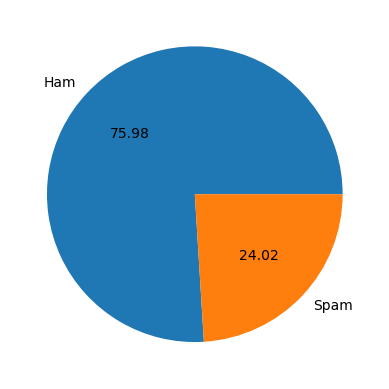

In [17]:
plt.pie(A["spam"].value_counts(),labels=["Ham","Spam",],autopct="%0.2f")
plt.show()

In [18]:
# Data is Imbalanced

In [19]:
import nltk

In [20]:
# nltk.download("punkt")

In [21]:
s='Go until'

In [22]:
len(s)

8

In [23]:
A["Num_Char"]=A["text"].apply(len)

In [24]:
A.head()

,text,spam,Num_Char
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [25]:
A["Num_Words"]=A["text"].apply(lambda x:len( nltk.word_tokenize(x)) ) 

In [26]:
A.head()

,text,spam,Num_Char,Num_Words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [27]:
A["Num_Sentences"]=A["text"].apply(lambda x:len( nltk.sent_tokenize(x)) ) 

In [28]:
A

,text,spam,Num_Char,Num_Words,Num_Sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9
...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30
5726,"Subject: re : interest david , please , call...",0,1060,277,6


In [29]:
A[["Num_Char","Num_Words","Num_Sentences"]].describe()

,Num_Char,Num_Words,Num_Sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [30]:
# to chack ham data 
A[A["spam"] == 0 ][["Num_Char","Num_Words","Num_Sentences"]].describe()

,Num_Char,Num_Words,Num_Sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [31]:
# to chack spam data
A[A["spam"] == 1 ][["Num_Char","Num_Words","Num_Sentences"]].describe()

,Num_Char,Num_Words,Num_Sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [32]:
import seaborn as sns


<Axes: xlabel='Num_Char', ylabel='Count'>

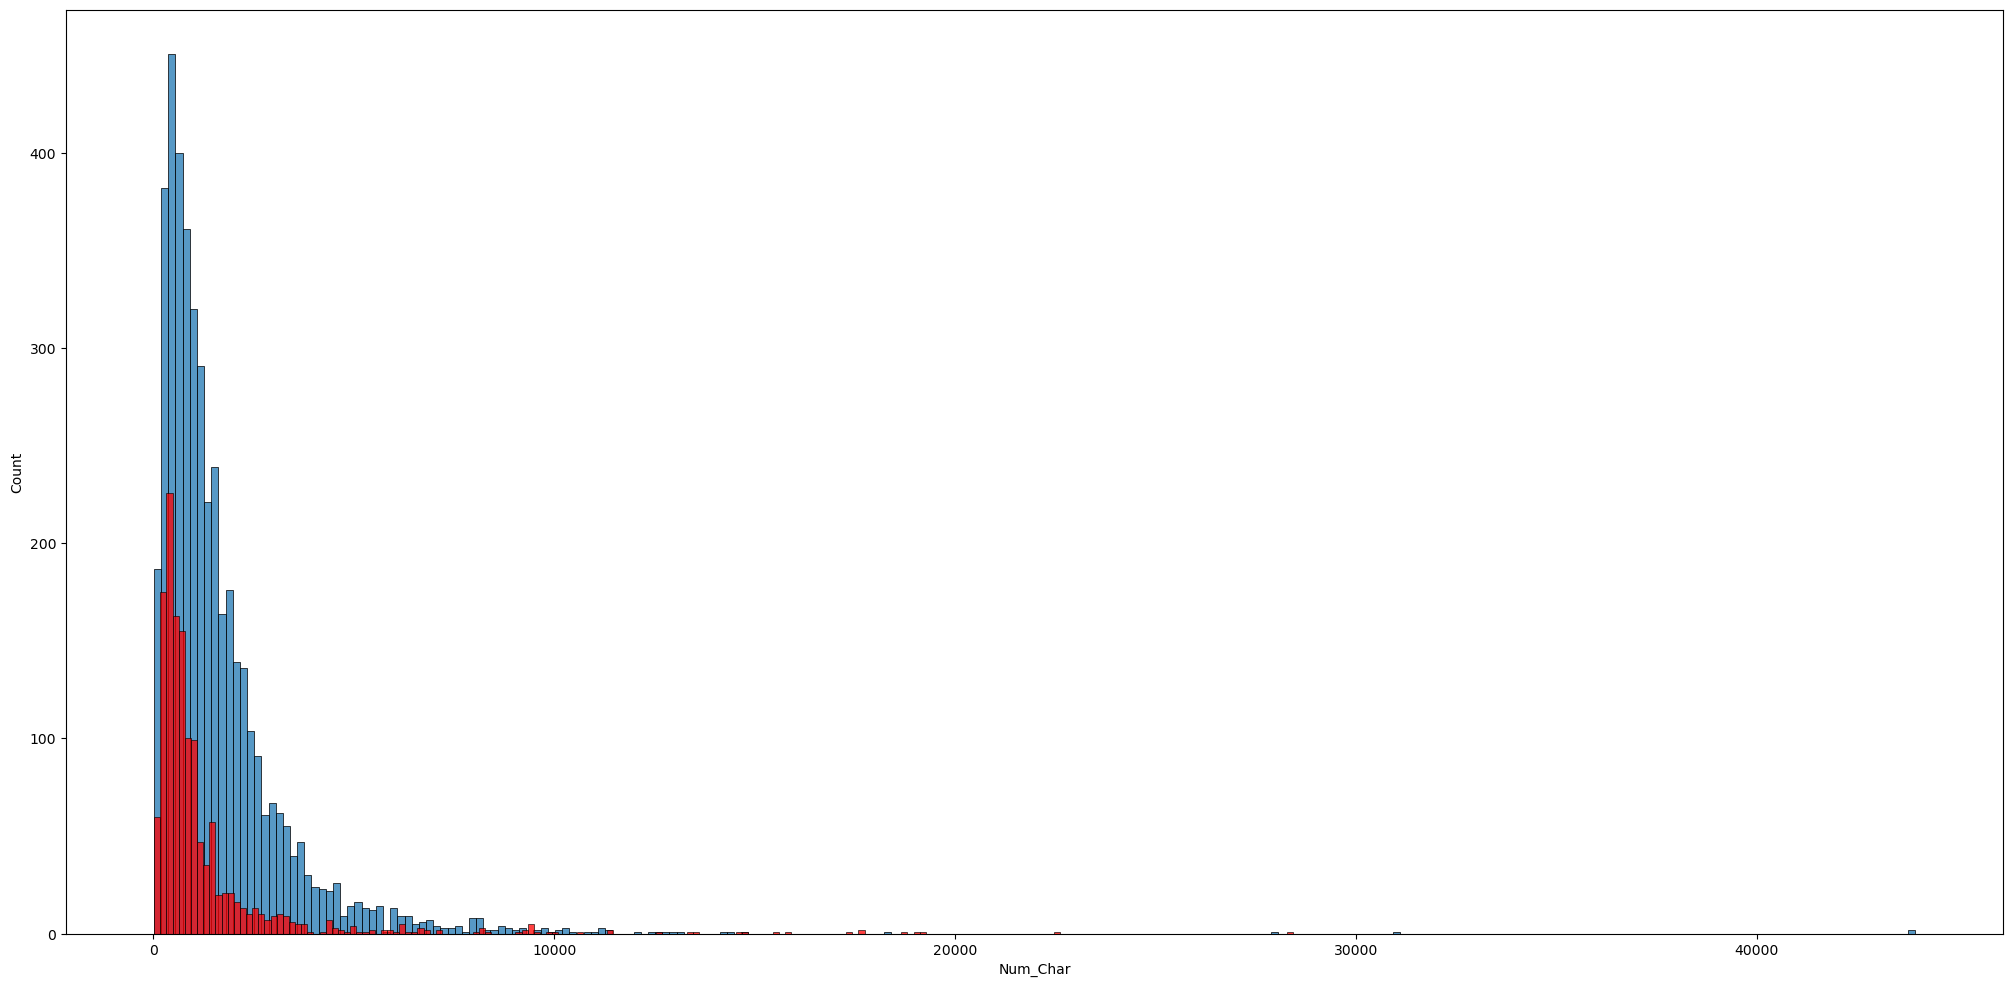

In [33]:

# Histrogream 
plt.figure(figsize=(25,12))
sns.histplot(A[A["spam"]==0]["Num_Char"])
sns.histplot(A[A["spam"]==1]["Num_Char"],color="red")

<Figure size 1500x1500 with 0 Axes>

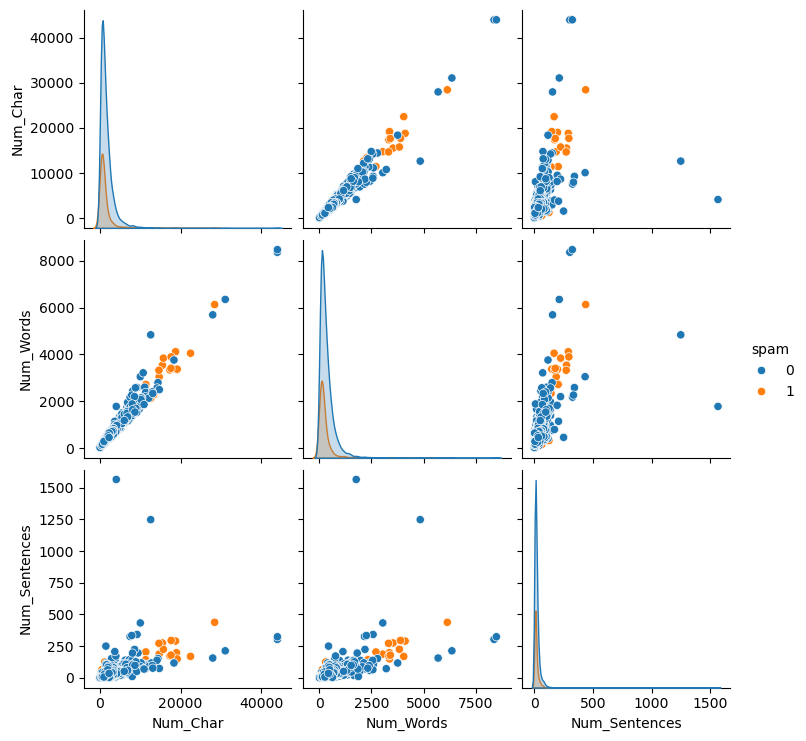

In [34]:
plt.figure(figsize=(15,15))

sns.pairplot(A,hue="spam")

In [35]:
# correlation

b= A[["Num_Char","Num_Words","Num_Sentences"]].corr()
b

,Num_Char,Num_Words,Num_Sentences
Num_Char,1.000000,0.986019,0.595728
Num_Words,0.986019,1.000000,0.660311
Num_Sentences,0.595728,0.660311,1.000000


<Axes: >

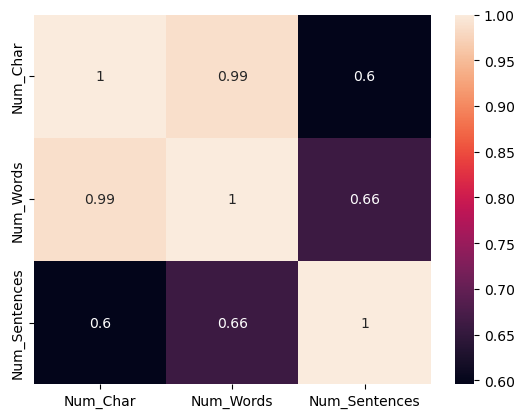

In [36]:
sns.heatmap(b,annot=True)

# 3. Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing Special Charactors
4. stemming.

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darshana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords

In [47]:
import string
string.punctuation       # List of Punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")       #Example of PorterStemmer

'love'

In [49]:
#  Function to Transformed the data

def Transform_Text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation and i != 'subject':
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)



In [50]:
w=str(A["text"][2594])
print(w)
print("\n After Transformation    : \n ",Transform_Text(w))

Subject: super saturday - dinner participation not needed  please see the attached memo . we will not be needing you to participate in  the dinner friday , december 8 th . thanks so much for volunteering ! ! !

 After Transformation    : 
  super saturday dinner particip need pleas see attach memo need particip dinner friday decemb 8 th thank much volunt


In [51]:
A["Transformed_Text"]=A["text"].apply(Transform_Text)
A

,text,spam,Num_Char,Num_Words,Num_Sentences,Transformed_Text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,1,500,99,5,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",1,235,53,9,money get softwar cd softwar compat great grow...
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,research develop charg gpg forward shirley cre...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,receipt visit jim thank invit visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,enron case studi updat wow day super thank muc...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,interest david pleas call shirley crenshaw ass...


In [52]:
# !pip install wordcloud

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width =800,height=800,min_font_size=10,background_color="white")

In [54]:
Spam_W_Count = wc.generate(A[A["spam"]==1]["Transformed_Text"].str.cat(sep=" "))

In [55]:
Spam_W_Count

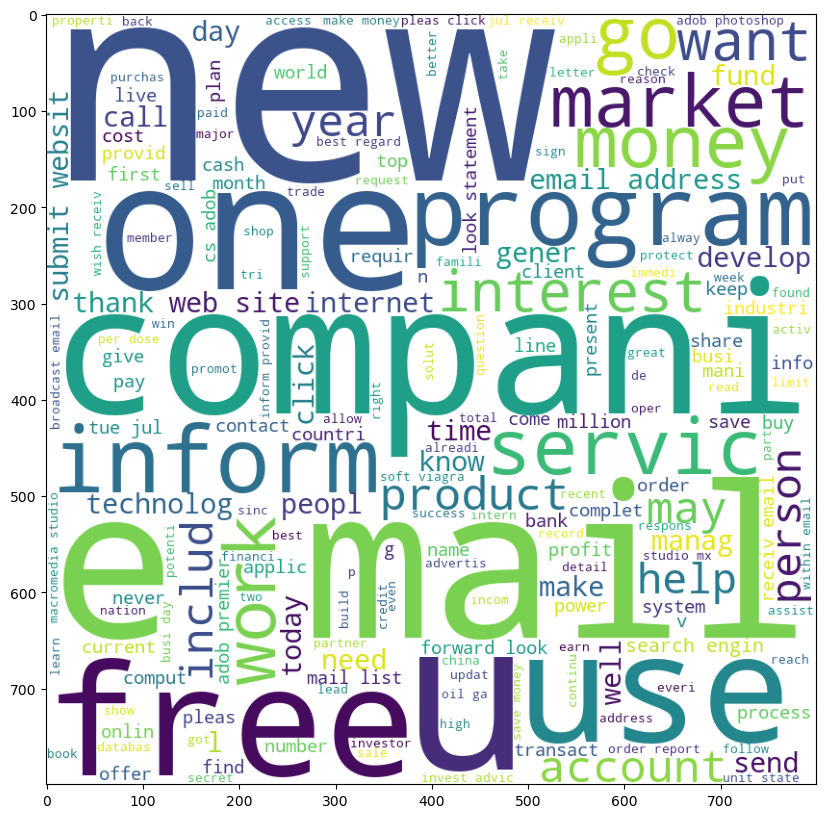

In [56]:
# collection of most common spam words 

plt.figure(figsize=(12,10))
plt.imshow(Spam_W_Count)

In [57]:
A.head()

,text,spam,Num_Char,Num_Words,Num_Sentences,Transformed_Text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,1,500,99,5,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",1,235,53,9,money get softwar cd softwar compat great grow...


In [58]:
Spam_corpus=[]
for text in A[A["spam"]==1]["Transformed_Text"].tolist():
    for i in text.split():
        Spam_corpus.append(i)

In [59]:
len(Spam_corpus)

173056

In [60]:
from collections import Counter
Counter(Spam_corpus).most_common(30)

[('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507)]

In [61]:
# list of most common spam word 

Common=pd.DataFrame(Counter(Spam_corpus).most_common(30))
Common

,0,1
0,compani,1065
1,com,1000
2,1,952
3,mail,917
4,busi,897
5,email,865
6,inform,818
7,receiv,727
8,e,701
9,get,694


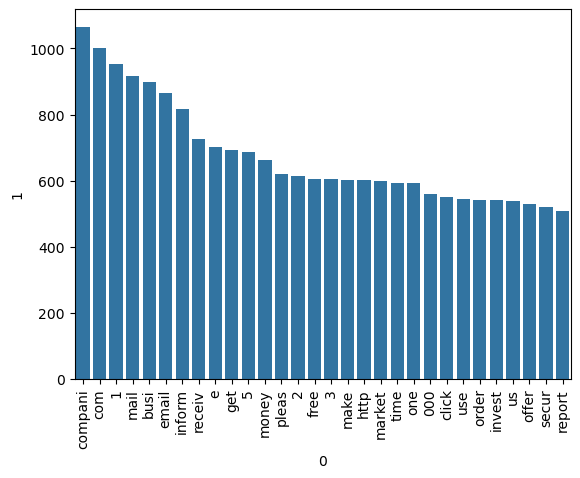

In [62]:
# Bar Plot of spam words

# plt.figure(figsize=(18,8))
sns.barplot(x=Common[0],y=Common[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
wc=WordCloud(width =800,height=800,min_font_size=10,background_color="white")

In [64]:
ham_W_Count=wc.generate(A[A["spam"]==0]["Transformed_Text"].str.cat(sep=" "))


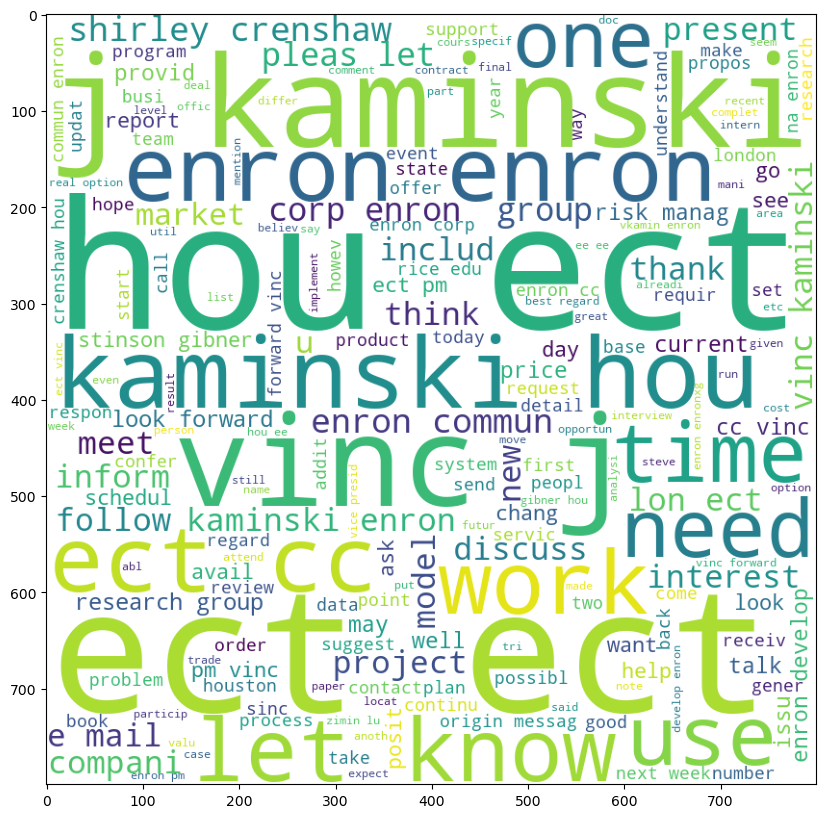

In [65]:
# collection of most common spam words 




plt.figure(figsize=(12,10))
plt.imshow(ham_W_Count)

In [66]:
Ham_corpus=[]
for text in A[A["spam"]== 0]["Transformed_Text"].tolist():
    for i in text.split():
        Ham_corpus.append(i)

In [67]:
len(Ham_corpus)

694446

In [68]:
# list of most common spam word 


Ham_common=pd.DataFrame(Counter(Ham_corpus).most_common(30))
Ham_common

,0,1
0,enron,13335
1,ect,11410
2,vinc,8468
3,hou,5567
4,2000,4932
5,kaminski,4754
6,pleas,4440
7,com,4397
8,would,4124
9,cc,3862


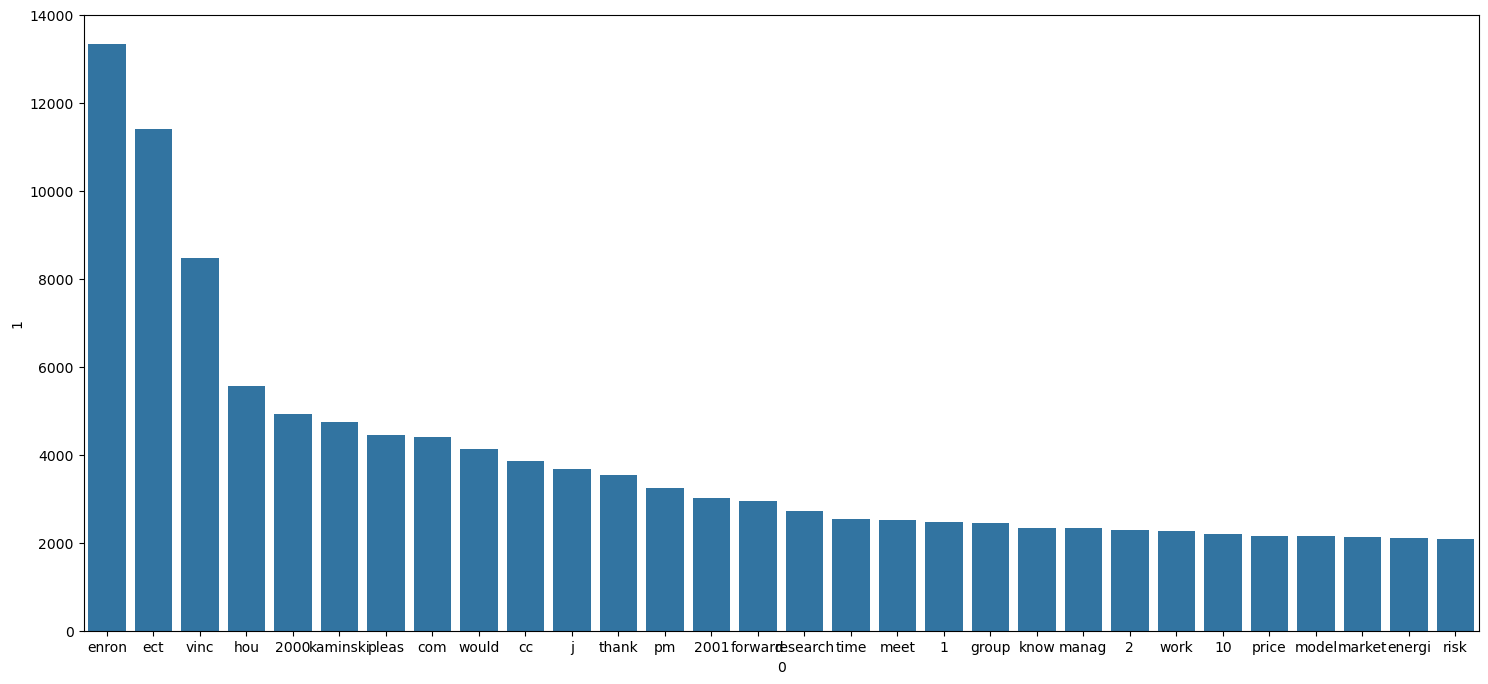

In [69]:
plt.figure(figsize=(18,8))
sns.barplot(x=Ham_common[0],y=Ham_common[1])
plt.show()

# 4.  Model Building

In [70]:
# To convert Categorical data into vactorizer form 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tv=TfidfVectorizer()

# 1st Method 
Using CountVectorizer

In [71]:
X=cv.fit_transform(A["Transformed_Text"]).toarray()
X.shape

(5695, 29220)

In [72]:
Y=A["spam"].values
Y.shape

(5695,)

## Split train and test datasets

We will split the loaded data into two separate datasets.

**Train dataset:** For training the text categorization model.

**Test dataset:** For validating the performence of the model.

In [73]:
from sklearn.model_selection import train_test_split as tts 


In [74]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.2, random_state=200)

In [75]:
# import Naive Bayes Models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [77]:
# Gaussian 
GNB.fit(x_train,y_train)
y_pred1=GNB.predict(x_test)

print('score   :',accuracy_score(y_test,y_pred1))
print('confusion_matrix :',confusion_matrix(y_test,y_pred1))
print('precision_score :',precision_score(y_test,y_pred1))

score   : 0.9438103599648815
confusion_matrix : [[831  19]
 [ 45 244]]
precision_score : 0.9277566539923955


In [78]:
# MultinomialNB
MNB.fit(x_train,y_train)
y_pred2=(MNB.predict(x_test))

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9929762949956101
[[842   8]
 [  0 289]]
0.9730639730639731


In [79]:
BNB.fit(x_train,y_train)
y_pred3=BNB.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9920983318700615
[[845   5]
 [  4 285]]
0.9827586206896551


# 2nd Method
TfidfVectorizer

In [80]:
x=tv.fit_transform(A["Transformed_Text"]).toarray()
x.shape

(5695, 29220)

In [81]:
y=A["spam"].values
y.shape


(5695,)

In [82]:
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.2, random_state=200)
print(X_train)
print(Y_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.19826982 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.07759621 0.         0.         ... 0.         0.         0.        ]]
[0 0 0 ... 1 0 0]


In [83]:
# Gaussian
GNB.fit(X_train,Y_train)
Y_pred1=GNB.predict(X_test)

print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9473222124670764
[[839  11]
 [ 49 240]]
0.9561752988047809


In [84]:
MNB.fit(X_train,Y_train)
Y_pred2=MNB.predict(X_test)

print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.8849868305531168
[[850   0]
 [131 158]]
1.0


In [85]:
BNB.fit(X_train,Y_train)
Y_pred3=BNB.predict(X_test)

print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9920983318700615
[[845   5]
 [  4 285]]
0.9827586206896551


In [86]:
# We use tfidf MNB high precision 

In [87]:
# pip install xgboost

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [89]:
LR= LogisticRegression() 
SVC=SVC(kernel='sigmoid',gamma=1.0)
DS=DecisionTreeClassifier(max_depth=5)
KNC=KNeighborsClassifier()
RF=RandomForestClassifier(n_estimators=50,random_state=2)
AB=AdaBoostClassifier(n_estimators=50,random_state=2)
BEG=BaggingClassifier(n_estimators=50,random_state=2)
ET=ExtraTreesClassifier(n_estimators=50,random_state=2)
XGB= XGBClassifier(n_estimators=50,random_state=2)

In [90]:
# LogisticRegression
LR.fit(x_train,y_train)
y_pred3=LR.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9912203687445127
[[845   5]
 [  5 284]]
0.9826989619377162


In [91]:
# Support Vactor Machine
SVC.fit(x_train,y_train)
y_pred4=SVC.predict(x_test)

print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred3))

0.8165057067603161
[[763  87]
 [122 167]]
0.9826989619377162


In [92]:
# DecisionTreeClassifier
DS.fit(x_train,y_train)
y_pred5=DS.predict(x_test)

print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9201053555750659
[[778  72]
 [ 19 270]]
0.7894736842105263


In [93]:
# KNeighborsClassifier
KNC.fit(x_train,y_train)
y_pred6=KNC.predict(x_test)

print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9051799824407375
[[833  17]
 [ 91 198]]
0.9209302325581395


In [94]:
# RandomForestClassifier
RF.fit(x_train,y_train)
y_pred7=RF.predict(x_test)

print(accuracy_score(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
print(precision_score(y_test,y_pred7))

0.9675153643546971
[[848   2]
 [ 35 254]]
0.9921875


In [95]:
# AdaBoostClassifier
AB.fit(x_train,y_train)
y_pred8=AB.predict(x_test)

print(accuracy_score(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))
print(precision_score(y_test,y_pred8))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9692712906057945
[[822  28]
 [  7 282]]
0.9096774193548387


In [96]:
# BaggingClassifier
BEG.fit(x_train,y_train)
y_pred9=BEG.predict(x_test)

print(accuracy_score(y_test,y_pred9))
print(confusion_matrix(y_test,y_pred9))
print(precision_score(y_test,y_pred9))

0.9754170324846356
[[832  18]
 [ 10 279]]
0.9393939393939394


In [97]:
# ExtraTreesClassifier
ET.fit(x_train,y_train)
y_pred10=ET.predict(x_test)

print(accuracy_score(y_test,y_pred10))
print(confusion_matrix(y_test,y_pred10))
print(precision_score(y_test,y_pred10))

0.9771729587357331
[[849   1]
 [ 25 264]]
0.9962264150943396


In [98]:
# XGBClassifier
XGB.fit(x_train,y_train)
y_pred12=XGB.predict(x_test)

print(accuracy_score(y_test,y_pred12))
print(confusion_matrix(y_test,y_pred12))
print(precision_score(y_test,y_pred12))

0.9859525899912204
[[837  13]
 [  3 286]]
0.9565217391304348


In [99]:
# pip install xgboost

WE TAKE MultinomialNB WHICH HAS HEIGHEST PRECISION AND ACCURACY SCORE

In [100]:
# Make a pickle file
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))

**Sample Spam mail**

In [102]:
print(A["text"][0],"\n")
print(A["text"][2],"\n")
print(A["text"][1],"\n")
print(A["text"][3],"\n")
print(A["text"][4],"\n")



Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

**Sample Ham mail**

In [104]:

print(A["text"][5723],"\n")
print(A["text"][5724],"\n")
print(A["text"][5725],"\n")
print(A["text"][5726],"\n")
print(A["text"][5727],"\n")


Subject: re : research and development charges to gpg  here it is !  - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000  07 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  vince j kaminski  08 / 10 / 2000 02 : 25 pm  to : vera apodaca / et & s / enron @ enron  cc : vince j kaminski / hou / ect @ ect , shirley crenshaw / hou / ect @ ect , pinnamaneni  krishnarao / hou / ect @ ect  subject : re : research and development charges to gpg  vera ,  we shall talk to the accounting group about the correction .  vince  08 / 09 / 2000 03 : 26 pm  vera apodaca @ enron  vera apodaca @ enron  vera apodaca @ enron  08 / 09 / 2000 03 : 26 pm  08 / 09 / 2000 03 : 26 pm  to : pinnamaneni krishnarao / hou / ect @ ect  cc : vince j kaminski / hou / ect @ ect  subject : research and development charges to gpg  per mail dated june 15 from kim watson , there was supposed to have occurred  a true - up of $ 274 . 7 in july for the fist six mo

# ML Model AWS Deployment

### Build the model

⚫Export the model using Pickle/Joblib

• Build a streamlit website to serve the model

### Deploy the website on AWS EC2

1. Create an AWS account

2. Create an EC2 instance

3. Edit security group

4. Downlood keygen(pem file)

5. Download and install Putty and WinSCP

6. Upload streamlit website to EC2 using WinSCP

7. Install the libraries by connecting through putty

8. streamlit run main.py
